# Investigating Trending Skills Over Year

In [20]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Analyzing Skill Trends for Data Scientist Jobs Over Time

In [35]:
# Step 1: Filter dataset to include only "Data Scientist" job postings
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

# Step 2: Extract the month from the job posting date
df_DS['job_posted_month_num'] = df_DS['job_posted_date'].dt.month

# Step 3: Explode the 'job_skills' column to have one skill per row
df_DS_explode = df_DS.explode('job_skills')

# Step 4: Create a pivot table to count the occurrences of each skill per month
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_num', 
                                         columns='job_skills', 
                                         aggfunc='size', 
                                         fill_value=0)

# Display the pivot table
df_DS_pivot


job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


## Processing Monthly Job Demand Data

### Steps:
1. **Reset Index:** Convert the index back to a column for further processing.
2. **Convert Month Number to Name:** Change numerical month values (1-12) into abbreviated month names (e.g., Jan, Feb).
3. **Set Month Names as Index:** Use the formatted month names as the new index.
4. **Drop Unnecessary Columns:** Remove the original numeric month column since it's no longer needed.

This process ensures that the data is structured clearly for analysis and visualization.

In [36]:
# Reset index to bring month numbers into a column
df_DS_pivot = df_DS_pivot.reset_index()

# Convert numeric month to short month name ('Jan', 'Feb', etc.)
df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month_num'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Set the index back to month names
df_DS_pivot = df_DS_pivot.set_index('job_posted_month')

# Drop the numerical month column (no longer needed)
df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_num')
df_DS_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
Feb,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
Mar,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
Apr,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
May,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
Jun,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
Jul,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
Aug,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
Sep,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


## Summarizing and Sorting Skills by Demand for Data Scientist Jobs

In [29]:
# Step 1: Calculate the total count for each skill across all months
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()

# Step 2: Sort skills by total occurrences in descending order
df_DS_final = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]

# Step 3: Remove the 'Total' row from the final dataset
df_DS_final = df_DS_final.drop('Total')

# Display the sorted Data Scientist skill trends over time
df_DS_final


job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,nuxt.js,mattermost,shogun,sqlserver,wimi
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
Feb,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
Mar,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,0,1,0,0
Apr,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
May,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
Jun,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
Jul,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
Aug,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
Sep,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


## Visualizing Monthly Trends for the Top 5 Skills in Data Scientist Jobs

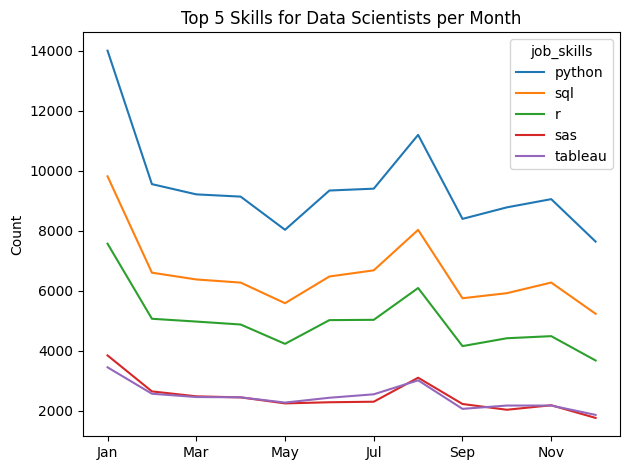

In [30]:
# Step 1: Select the top 5 most in-demand skills
df_DS_final.iloc[:, :5].plot(kind='line')

# Step 2: Customize the plot
plt.title('Top 5 Skills for Data Scientists per Month')  # Set the title
plt.ylabel('Count')  # Label the y-axis
plt.xlabel('')  # Remove the x-axis label for clarity
plt.tight_layout()  # Adjust layout for better readability

# Step 3: Display the line plot
plt.show()
